In [1]:
import numpy as np
from numpy.polynomial import Polynomial
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
def LSM2(_xdata, _ydata, _coefs, _order):
    """LSM with scaling xdata process
    """
    _a = np.array([[0.0 for j in range(_order + 2)] for i in range(_order + 1)])
    _sum_of_powers = np.array([0.0 for i in range((_order * 2) + 1)])
       
    # Scaling xdata
    _s = 2 / (_xdata.max() - _xdata.min())
    _t = _s * _xdata.mean()
    _xdata = _s * _xdata - _t
    
    # Create Enlarged coeffient matrix
    for k in range(len(_xdata)):
        for i in range(0, (_order * 2) + 1, 1):
            _sum_of_powers[i] += pow(_xdata[k], i)
        for i in range(_order + 1):
            _a[i][_order + 1] += pow(_xdata[k], i) * _ydata[k]
    print(_sum_of_powers)
    for i in range(_order + 1):
        for j in range(_order + 1):
            _a[i][j] = _sum_of_powers[i + j]
    print('Enlarged coeffient matrix : ')
    print(_a)
    # Gauss-Jordan method　w/o pivot selection
    for k in range(_order + 1):
        _pivot = _a[k][k]
        for j in range(k, _order + 2):
            _a[k][j] /= _pivot
        for i in range(_order + 1):
            if(k != i):
                for j in range(k, _order + 2):
                    _a[i][j] -= _a[i][k] * _a[k][j]
    for i in range(_order + 1):
        _coefs.append(_a[i][_order + 1])
    print('Sweeped : ')
    print(_a)
    print(f's:{s}, t:{t}')
    print('Coeffient : ')
    print(_coefs)
    return _s, _t

In [55]:
def LSM(_xdata, _ydata, _order):
    _coefs = []
    _a = np.array([[0.0 for j in range(_order + 2)] for i in range(_order + 1)])
    _sum_of_powers = np.array([0.0 for i in range(_order * 2 + 1)])
    _right = [0.0 for i in range(_order + 1)]
    
    # Create Enlarged coeffient matrix
    for i in range(len(_xdata)):
        for j in range((_order * 2) + 1):
            _sum_of_powers[j] += pow(_xdata[i], j)
        for j in range(_order + 1):
            _right[j] += (pow(_xdata[i], j) * _ydata[i])
    # print(_sum_of_powers)
    for i in range(_order + 1):
        for j in range(_order + 1):
            _a[i][j] = _sum_of_powers[i + j]
        _a[i][_order + 1] = _right[i]
    print('Enlarged coeffient matrix : ')
    print(_a)
    
    # Gauss-Jordan method　w/o pivot selection
    for k in range(_order + 1):
        _pivot = _a[k][k]
        for j in range(k, _order + 2):
            _a[k][j] /= _pivot
        for i in range(_order + 1):
            if i != k:
                for j in range(k, _order + 1):
                    _a[i][j] -= (_a[i][k] * _a[k][j])
    for i in range(_order + 1):
        _coefs.append(_a[i][_order + 1])
    print('Sweeped : ')
    print(_a)
    return _coefs
            
# xdata = np.array([-166.7 + i * 0.5 for i in range(0, 5, 1)])
xdata = np.array([0.7 + i * 0.5 for i in range(0, 5, 1)])
ydata = np.array([70.7, 3.0, 2.95, 2.73, 2.62])
coefs = LSM(xdata, ydata, 3)
# s, t = LSM2(xdata, ydata, coeff, 3)
d, c, b, a = coefs
# a = s**3 * a0
# b = -3 * s**2 * t * a0 + s ** 2 * b0
# c = 3 * s * t ** 2 * a0 - 2 * s * t * b0 + s * c0
# d = -t ** 3 * a0 + t ** 2 * b0 - t * c0 + d0
# print(f'{a} : {b} : {c} : {d}')

x = np.linspace(xdata.min() - 1.0, xdata.max() + 1.0, 1000)
y = a * x * x * x + b * x * x + c * x + d
# y = a * (s*x-t) ** 3 + b * (s*x-t) ** 2 + c * (s*x-t) + d
W3 = Polynomial.fit(xdata, ydata, 3)
print(W3.convert().coef)
y_hat = W3(x)

Enlarged coeffient matrix : 
[[  5.         8.5       16.95      37.315     82.      ]
 [  8.5       16.95      37.315     87.2355    71.185   ]
 [ 16.95      37.315     87.2355   211.88035   79.8015  ]
 [ 37.315     87.2355   211.88035  528.041595 124.56595 ]]
Sweeped : 
[[ 1.          0.          0.          0.         16.4       ]
 [ 0.          1.          0.          0.          4.19970501]
 [ 0.          0.          1.          0.          0.9147824 ]
 [ 0.          0.          0.          1.          0.23590178]]
[ 311.13122286 -510.54710476  268.21028571  -45.02666667]


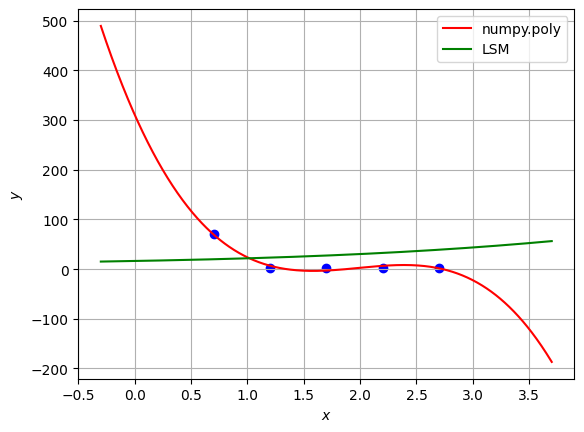

MSE: 13.250314285714301
[0.7 1.2 1.7 2.2 2.7]
[70.7   3.    2.95  2.73  2.62]


In [57]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata, marker='o', color='b')
ax.plot(x, W3(x), color='r', label='numpy.poly')
ax.plot(x, y, color='g', label='LSM')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
# ax.set_ylim([0,20])
ax.grid()
ax.legend()
plt.show()
MSE = np.mean((ydata - W3(xdata)) ** 2)
print(f'MSE: {MSE}')
plt.close()
print(xdata)
print(ydata)

### Test Case
- Case1
    - MSE: 2.8571428571429127e-05
    - [-166.7 -166.2 -165.7 -165.2 -164.7]
    - [2.7  3.   2.95 2.73 2.62]
- Case2
    - MSE: 2.8571428571429127e-05
    - [-100.7 -100.2  -99.7  -99.2  -98.7]
    - [2.7  3.   2.95 2.73 2.62]
- Case3
    - MSE: 2.8571428571429127e-05
    - [10.7 11.2 11.7 12.2 12.7]
    - [2.7  3.   2.95 2.73 2.62]
- Case4
    - MSE: 2.8571428571429127e-05
    - [1.7 2.2 2.7 3.2 3.7]
    - [2.7  3.   2.95 2.73 2.62]
- Case5
    - MSE: 13.250314285714301
    - [0.7 1.2 1.7 2.2 2.7]
    - [70.7   3.    2.95  2.73  2.62]